In [23]:
import numpy as np
import hypertools as hyp
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

%matplotlib inline

# Visualizing high-dimensional random walks
A random walk is a series of (simulated) measurements or observations, where each measurement is similar to the previous measurement.  Random walks are used to simulate phenomena that change gradually over time (e.g. movements through space).

If $x(0) \in \mathcal{R}^N$ is the starting point of the system (e.g. the first observation in a sequence), then each new observation is given by

$$x(t) \sim \mathcal{N}(x(t-1), \Sigma)$$

for $t \geq 1$.  Here we will set $\Sigma$ to the identity matrix (a matrix with 1s on the diagonal and 0s everywhere else).  That means that each dimension will vary independently of every other.

## `random_walk`
Takes the number of dimensions (`N`), and the number of timepoints (`T`).  The function returns a `numpy` array with `T` rows and `N` columns, containing the coordintates of the random walk.

## `summarize_distance`
Takes a number of dimensions (`N`), number of timepoints (`T`), and a number of repetitions (`R`).  The function calls `random_walk` to generate `R` random walks.  The function returns a `T`-1 by `R` matrix of distances (from the starting point) at each timestep of each of the `R` simulations.

## `ribbon`
Take a `T` by `N` matrix and create a line plot with a 95% confidence interval error ribbon around each of the `T` timepoints (where the errors are computed across the `N` observations at each timepoint).  Also take an optional `color` argument (controls the line and ribbon colors) and an optional `alpha` argument (controls the transparency of the ribbon).  Return the figure handles of the average line and the error ribbon.

In [24]:
def random_walk(N, T):
    #sanity checks (implemented strangely to use if/elif/else statements)
    if N <= 0:
        N = 1
    elif T <= 0:
        T = 1
    else:
        pass
    return np.cumsum(np.random.randn(T, N), axis=0)

In [48]:
def summarize_distance(N, T, R):
    while R <= 0: #super inefficient way of ensuring that R > 0
        R += 1
    
    D = np.zeros([T-1, R])
    for r in range(R):
        next_walk = random_walk(N, T)
        D[:, r] = cdist(np.atleast_2d(next_walk[0, :]), next_walk[1:, :])
    return D

In [40]:
def ribbon(M, color='k', alpha=0.5):    
    x = np.arange(M.shape[0])
    y = np.mean(M, axis=1)
    ci = 1.96 * np.divide(np.std(M, axis=1), np.sqrt(M.shape[1] - 1))
    
    h1 = plt.fill_between(x, y - ci, y + ci, color=color, alpha=alpha)
    h2 = plt.plot(x, y, color=color)
    return h1, h2

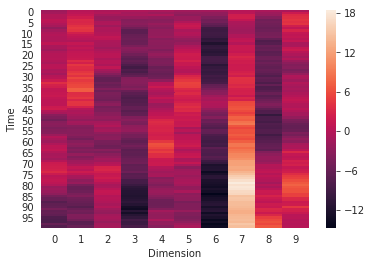

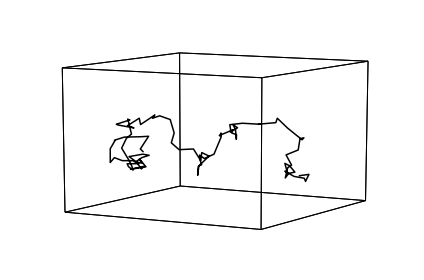

In [42]:
#visualize a random walk in 10-D
x = random_walk(10, 100)

#show a heatmap
sns.heatmap(x)
plt.xlabel('Dimension')
plt.ylabel('Time')
plt.show()

#project trajectory onto 3D
hyp.plot(x, 'k-');

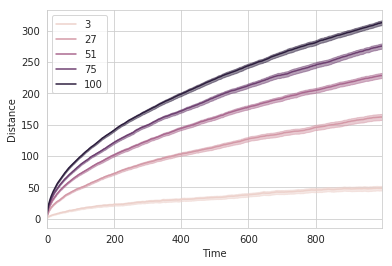

In [57]:
#plot distance from start over time, as a function of N
min_dim = 3
max_dim = 100
n_sims = 5

n_dims = np.linspace(min_dim, max_dim, n_sims)
T = 1000 #number of timepoints
R = 100 #repetions per simulation
colors = sns.cubehelix_palette(n_colors=n_sims)
for i, n in enumerate(n_dims):
    ribbon(summarize_distance(int(np.round(n)), T, R), color=colors[i])
plt.xlabel('Time')
plt.ylabel('Distance')
plt.xlim([0, T-2])
plt.legend([str(int(x)) for x in n_dims]);